In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [3]:
doctopic_triples = []
mallet_docnames = []

In [4]:
#here you can put the strings you want to get rid off when showing the titles
list_authors_to_replace=['Zola-Emile','Dumas-Alexandre-Pere','Dumas-Alexandre','Balzac-Honore-de','Verne-Jules','Sand-George','Flaubert-Gustave']
list_authors_to_find=['Giono-Jean']
list_titles_to_find=['Vingt-mille-lieues-sous-les-mers']
argsfig='./figs/giono_1_last'

In [5]:
def replace_all(text, dic):
    for i in dic:
        text = text.replace(i, "")
    return text

In [6]:
list_chaps=list()

In [7]:
with open("/home/odysseus/Bureau/chapitres/code/topic_modelling_mallet/results/doc-topics-glob-chaps.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        docname = os.path.basename(docname)
        if docname.split('_')[2] in list_titles_to_find:
        #if docname.split('_')[1] in list_authors_to_find and ('_1.' in docname or '_'+str(max(list_chaps))+'.' in docname):
            #docname=replace_all(docname, list_authors_to_replace)
            docname=docname.split('_')[3].replace('.txt','')
            mallet_docnames.append(int(docname))
            print(docname)
            for topic, share in grouper(2, values):
                triple = (int(docname), int(topic), float(share))
                doctopic_triples.append(triple)

22
2
42
19
43
4
7
37
25
23
14
45
21
6
39
33
26
5
27
34
44
28
10
32
41
18
11
3
20
46
1
35
36
40
47
12
8
16
24
29
9
38
13
30
31
15
17


In [8]:
print(doctopic_triples)

[(22, 5, 0.4403614457831325), (22, 14, 0.1463855421686747), (22, 12, 0.07409638554216867), (22, 15, 0.05963855421686747), (22, 17, 0.058433734939759036), (22, 8, 0.03072289156626506), (22, 16, 0.029518072289156625), (22, 0, 0.025903614457831327), (22, 13, 0.019879518072289156), (22, 4, 0.019879518072289156), (22, 1, 0.018674698795180723), (22, 11, 0.01746987951807229), (22, 3, 0.01144578313253012), (22, 2, 0.010240963855421687), (22, 7, 0.009036144578313253), (22, 6, 0.00783132530120482), (22, 18, 0.006626506024096385), (22, 10, 0.006626506024096385), (22, 9, 0.004216867469879518), (22, 19, 0.0030120481927710845), (2, 5, 0.2554347826086957), (2, 0, 0.2358695652173913), (2, 14, 0.16195652173913044), (2, 1, 0.07717391304347826), (2, 2, 0.042391304347826085), (2, 17, 0.03804347826086957), (2, 4, 0.03152173913043478), (2, 11, 0.020652173913043477), (2, 6, 0.020652173913043477), (2, 19, 0.016304347826086956), (2, 8, 0.016304347826086956), (2, 3, 0.014130434782608696), (2, 9, 0.0119565217391

In [9]:
mallet_docnames = sorted(mallet_docnames)

In [10]:
num_docs = len(mallet_docnames)

In [11]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

In [12]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

940
20


In [13]:
doctopic = np.zeros((num_docs, num_topics))

In [14]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [15]:
novel_names = []

In [16]:
for fn in mallet_docnames:
    basename = os.path.basename(str(fn))
    name, ext = os.path.splitext(basename)
    novel_names.append(name)
print(len(novel_names))

47


In [17]:
novel_names = np.asarray(novel_names)

In [18]:
doctopic

array([[0.17631103, 0.02260398, 0.04249548, 0.01898734, 0.03345389,
        0.45117541, 0.0045208 , 0.00632911, 0.0045208 , 0.01717902,
        0.0045208 , 0.00632911, 0.01717902, 0.00813743, 0.13110307,
        0.00813743, 0.00632911, 0.02802893, 0.00632911, 0.00632911],
       [0.23586957, 0.07717391, 0.0423913 , 0.01413043, 0.03152174,
        0.25543478, 0.02065217, 0.01195652, 0.01630435, 0.01195652,
        0.00543478, 0.02065217, 0.0076087 , 0.00543478, 0.16195652,
        0.00978261, 0.00978261, 0.03804348, 0.0076087 , 0.01630435],
       [0.05769231, 0.01923077, 0.010181  , 0.05316742, 0.04411765,
        0.39479638, 0.01696833, 0.00565611, 0.0260181 , 0.02828054,
        0.01244344, 0.06674208, 0.06447964, 0.00791855, 0.06447964,
        0.02149321, 0.03280543, 0.03054299, 0.01470588, 0.02828054],
       [0.08504673, 0.02149533, 0.02336449, 0.00654206, 0.0364486 ,
        0.41214953, 0.02523364, 0.00841121, 0.00841121, 0.00654206,
        0.0046729 , 0.00654206, 0.02897196, 0

In [19]:
doctopic_orig = doctopic.copy()

In [20]:
num_groups = len(set(novel_names))
print(num_groups)

47


In [21]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [22]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [23]:
doctopic = doctopic_grouped

In [24]:
doctopic

array([[0.17631103, 0.02260398, 0.04249548, 0.01898734, 0.03345389,
        0.45117541, 0.0045208 , 0.00632911, 0.0045208 , 0.01717902,
        0.0045208 , 0.00632911, 0.01717902, 0.00813743, 0.13110307,
        0.00813743, 0.00632911, 0.02802893, 0.00632911, 0.00632911],
       [0.17071197, 0.01860841, 0.01375405, 0.00728155, 0.02184466,
        0.33414239, 0.06067961, 0.00728155, 0.02831715, 0.02831715,
        0.01213592, 0.01213592, 0.11084142, 0.02508091, 0.04449838,
        0.01699029, 0.02508091, 0.0315534 , 0.00889968, 0.02184466],
       [0.16613162, 0.01364366, 0.01203852, 0.01043339, 0.00722311,
        0.20786517, 0.00882825, 0.01685393, 0.20304976, 0.03130016,
        0.00882825, 0.00722311, 0.05537721, 0.00401284, 0.1565008 ,
        0.04895666, 0.01364366, 0.01203852, 0.00401284, 0.01203852],
       [0.08420139, 0.0234375 , 0.01302083, 0.00607639, 0.00954861,
        0.30121528, 0.00434028, 0.0078125 , 0.00607639, 0.01128472,
        0.00434028, 0.04253472, 0.03559028, 0

In [25]:
N, K = doctopic.shape
print(K)

20


In [26]:
ind = np.arange(N)

In [27]:
width = 0.5

In [28]:
plt.rcParams["figure.figsize"] = [16,9]

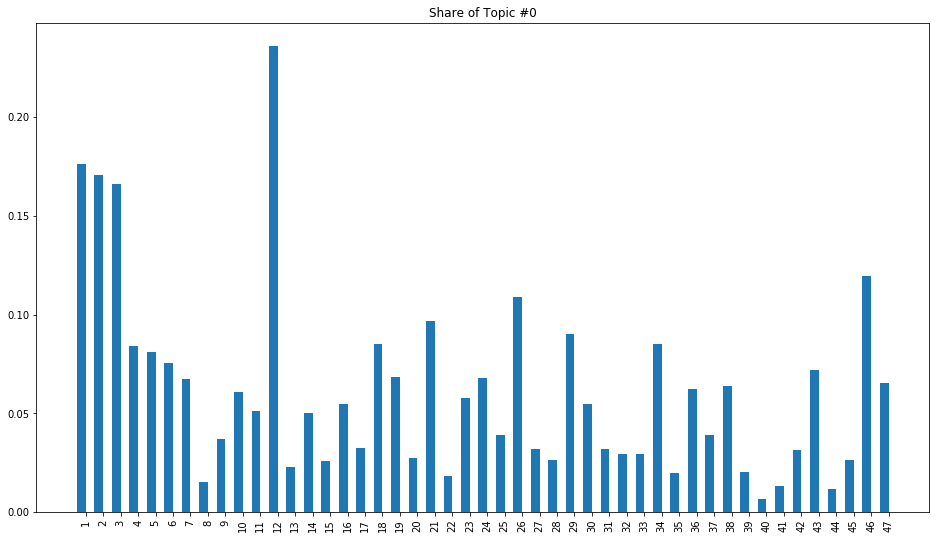

In [29]:
plt.bar(ind, doctopic[:,0], width=width)
plt.xticks(rotation=90)
plt.xticks(ind + width/2, novel_names)
plt.title('Share of Topic #0')
plt.show()

In [30]:
plots = []

In [31]:
height_cumulative = np.zeros(N)

In [32]:
list_topics =['espace domestique', 'vie conjugale', 'affaires/argent/mondanités', '?', 'noblesse', 'justice/crime', 'réflexions sur l\'existence', 'police/intrigue/bureaucratie', 'corps public/théâtre/festivités', 'temps','armée','?','nature/éléments/cosmos','voyage','sentiment','corps (morbide ?)','marine','famille','nature/végétal','religion']

In [33]:
list_topics_glob =['monde domestique', 'temps', 'famille', 'marine', 'corps (entier)', 'réflexions sur l\'existence', '?', 'famille (proche) ?', 'crime/affaire','armée', 'religion','sentiment','corps (visage)','mondanités','noblesse/titres','argot','nature','noblesse/lieux de noblesse','vie/mort','?']

In [34]:
list_topics_glob_chaps =['savoir (universitaire ?)', '?', 'judiciaire', '? (monde de la ville et de la nuit)', 'armée', 'marine', 'sentiments', 'noblesse (de salon)', 'arts','religion', 'nature','police','argent/affaires','corps','nature/éléments','monde domestique','troquets ?','chasse/homme et animal','famille','noblesse masculine/haute noblesse']

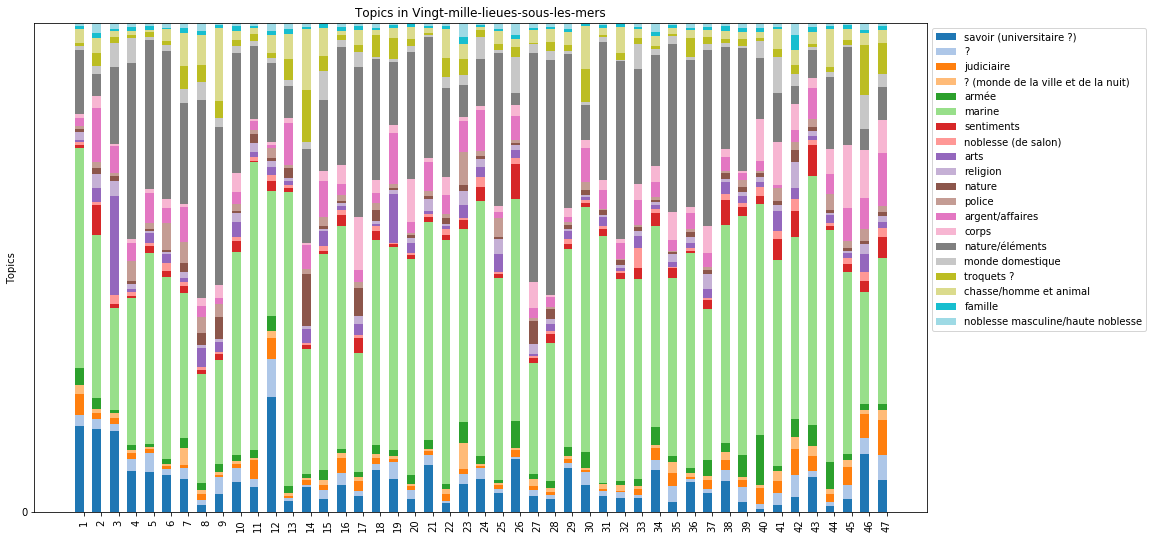

In [35]:
fig=plt.figure()
for k in range(K):
    color = plt.cm.tab20(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)

plt.ylim((0, 1))
plt.ylabel('Topics')
plt.title('Topics in '+', '.join(list_titles_to_find))
plt.xticks(rotation=90)
plt.xticks(ind+width/2, novel_names)
plt.yticks(np.arange(0, 1, 10))
topic_labels = [k for k in list_topics_glob_chaps]
plt.legend([p[0] for p in plots], topic_labels,bbox_to_anchor=(1,1), loc="upper left")
fig.savefig(argsfig+'.png',bbox_inches='tight')
plt.close(fig)
display(fig)